In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sbn
import folium

In [3]:
df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/historical_automobile_sales.csv')
print('Data downloaded and read into a dataframe!')

Data downloaded and read into a dataframe!


In [16]:
df.head()

,Date,Year,Month,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales,Vehicle_Type,City
0,1/31/1980,1980,Jan,1,108.24,0.50,27483.571,1558,7,60.223,0.010000,5.4,456.0,Supperminicar,Georgia
1,2/29/1980,1980,Feb,1,98.75,0.75,24308.678,3048,4,45.986,-0.309594,4.8,555.9,Supperminicar,New York
2,3/31/1980,1980,Mar,1,107.48,0.20,28238.443,3137,3,35.141,-0.308614,3.4,620.0,Mediumfamilycar,New York
3,4/30/1980,1980,Apr,1,115.01,1.00,32615.149,1653,7,45.673,0.230596,4.2,702.8,Supperminicar,Illinois
4,5/31/1980,1980,May,1,98.72,0.20,23829.233,1319,4,52.997,0.138197,5.3,770.4,Smallfamiliycar,California


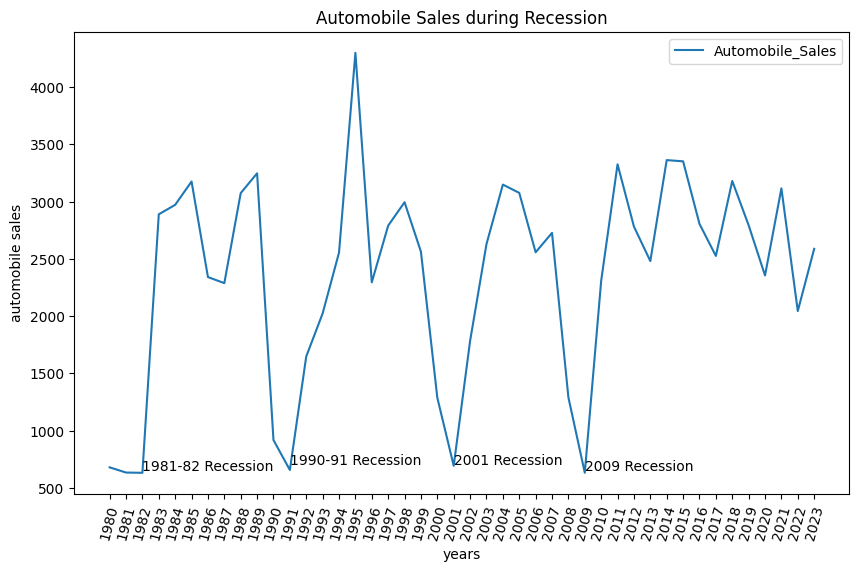

In [9]:
df_line = df.groupby(df['Year'])['Automobile_Sales'].mean()
plt.figure(figsize=(10, 6))
df_line.plot(kind = 'line')
plt.xlabel('years')
plt.xticks(list(range(1980,2024)),rotation=75)
plt.ylabel('automobile sales')
plt.text(1982, 650, '1981-82 Recession')
plt.title('Automobile Sales during Recession')
plt.text(1991,700,'1990-91 Recession')
plt.text(2001,700,'2001 Recession')
plt.text(2009,650,'2009 Recession')
plt.legend()
plt.show()

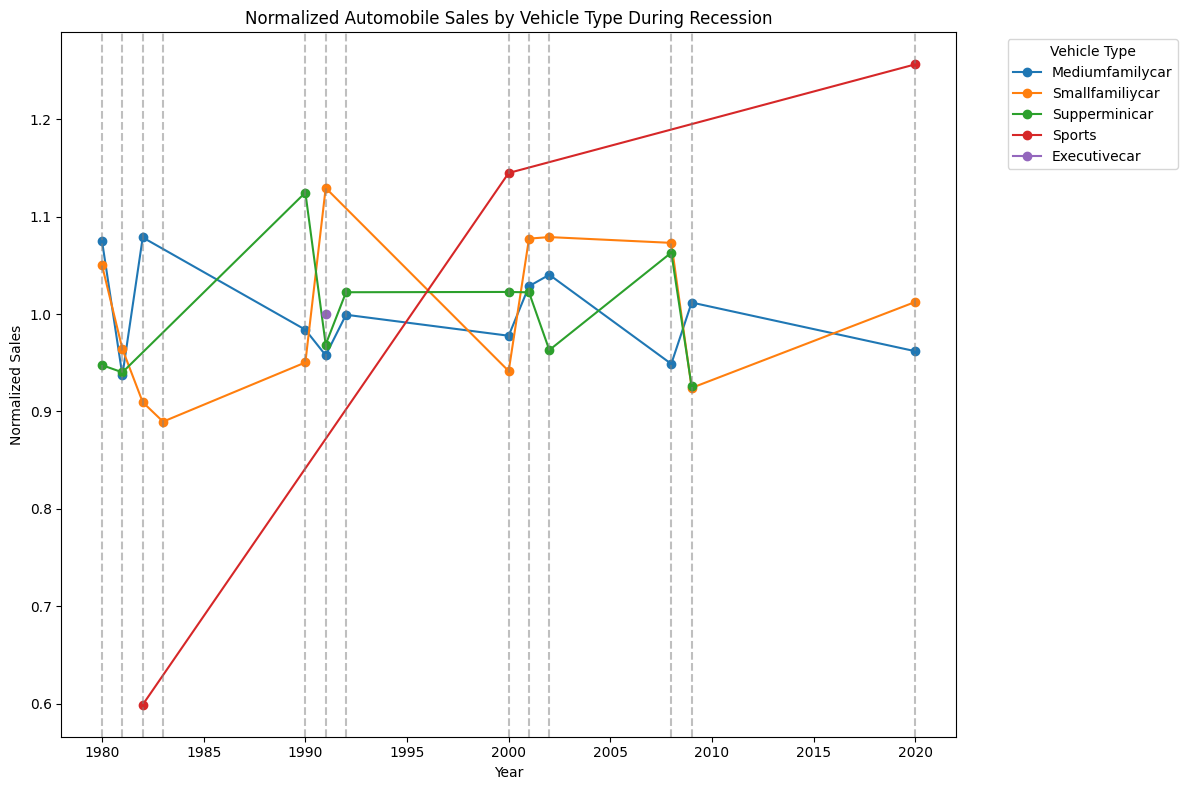

In [26]:
df_rec=df[df['Recession']==1]
df_mline=df_rec.groupby(['Year','Vehicle_Type'],as_index=False)['Automobile_Sales'].mean()
df_mline['normalized_sales']=df_mline.groupby('Vehicle_Type')['Automobile_Sales'].transform(lambda x:x/x.mean())
df_mline.set_index('Year',inplace=True)
df_mline
plt.figure(figsize=(12, 8))
for vehicle_type in df_mline['Vehicle_Type'].unique():
    data = df_mline[df_mline['Vehicle_Type'] == vehicle_type]
    plt.plot(data.index, data['normalized_sales'], label=vehicle_type, marker='o')
recession_years = df_rec['Year'].unique()
for year in recession_years:
    plt.axvline(x=year, color='gray', linestyle='--', alpha=0.5)
plt.legend(title="Vehicle Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.ylabel("Normalized Sales")
plt.xlabel("Year")
plt.title("Normalized Automobile Sales by Vehicle Type During Recession")
plt.tight_layout()
plt.show()

The most dramatic trend is the Sports car, which transformed from the worst performing category during the 1980s recession to the strongest performing by 2020. Supperminicars are the most resilient, as their sales consistently remain stable around the 1.0 "normal" baseline. Medium family cars show a steady decline in relative performance, while Small family cars are the most volatile. Overall, the impact of recessions on car sales has shifted significantly over the last 40 years.

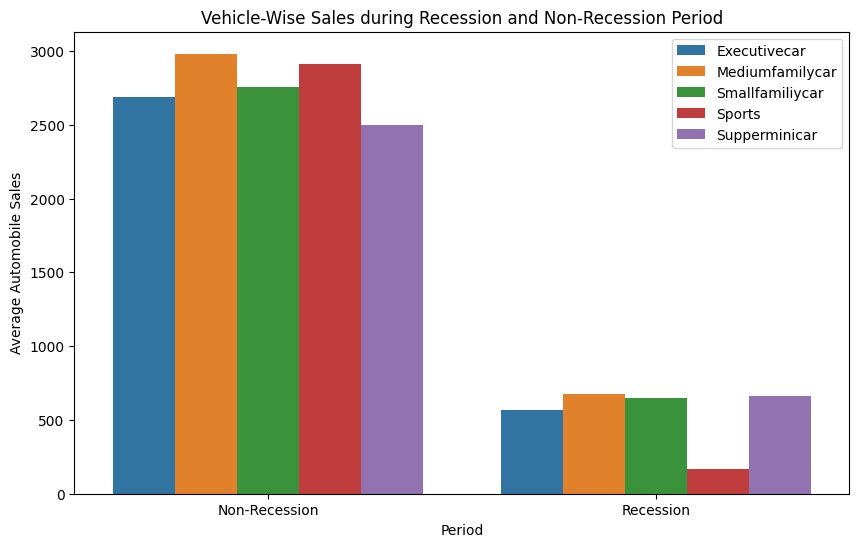

In [44]:
grouped_df = df.groupby(['Recession', 'Vehicle_Type'])['Automobile_Sales'].mean().reset_index()
plt.figure(figsize=(10, 6)) 
sbn.barplot(x='Recession', y='Automobile_Sales', hue='Vehicle_Type', data=grouped_df)
plt.xticks(ticks=[0, 1], labels=['Non-Recession', 'Recession'])
plt.xlabel('Period')
plt.ylabel('Average Automobile Sales')
plt.title('Vehicle-Wise Sales during Recession and Non-Recession Period')
plt.legend()
plt.show()

During a recession, consumers stop buying luxury/discretionary vehicles (like sports cars) and shift their spending to the most practical, economical options (like supperminicars)

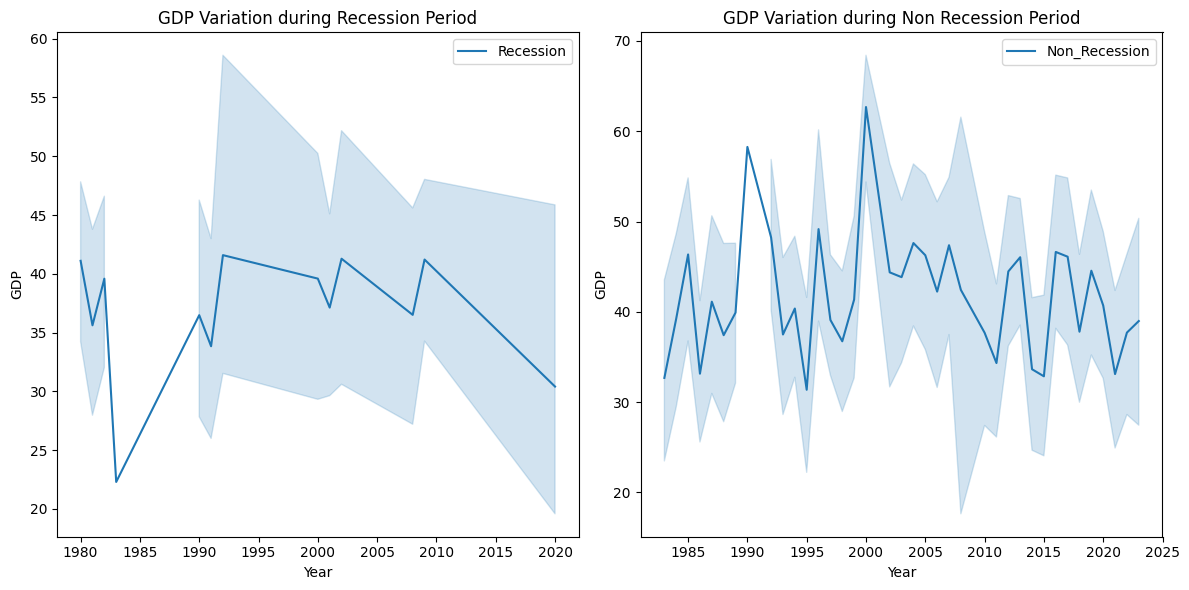

In [47]:

#Create dataframes for recession and non-recession period
rec_data = df[df['Recession'] == 1]
non_rec_data = df[df['Recession'] == 0]
    
    #Figure
fig=plt.figure(figsize=(12, 6))
    
    #Create different axes for subploting
ax0 = fig.add_subplot(1, 2, 1) # add subplot 1 (1 row, 2 columns, first plot)
ax1 = fig.add_subplot(1,2,2) # add subplot 2 (1 row, 2 columns, second plot). 
    
    #plt.subplot(1, 2, 1)
sbn.lineplot(x='Year', y='GDP', data=rec_data, label='Recession', ax=ax0)
ax0.set_xlabel('Year')
ax0.set_ylabel('GDP')
ax0.set_title('GDP Variation during Recession Period')
    
    #plt.subplot(1, 2, 2)
sbn.lineplot(x='Year', y='GDP', data=non_rec_data, label='Non_Recession',ax=ax1)
ax1.set_xlabel('Year')
ax1.set_ylabel('GDP')
ax1.set_title('GDP Variation during Non Recession Period')
 
plt.tight_layout()
plt.show()

Based on the graphs, GDP during recession periods is not only highly volatile but also shows a clear declining trend, whereas GDP in non-recession periods is much more stable and predictable.

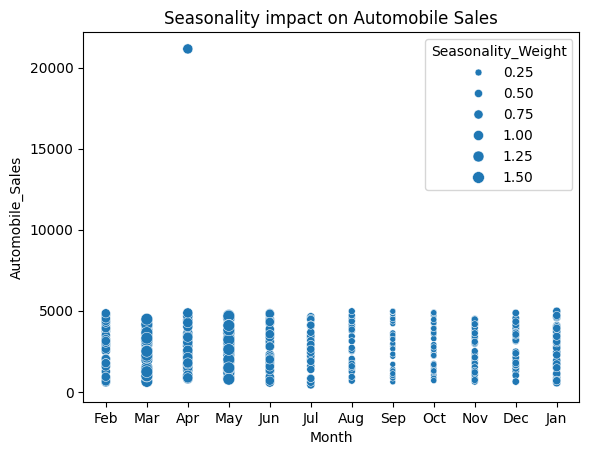

In [49]:
non_rec_data = df[df['Recession'] == 0]    
size=non_rec_data['Seasonality_Weight'] #for bubble effect
sbn.scatterplot(data=non_rec_data, x='Month', y='Automobile_Sales', size=size)
plt.xlabel('Month')
plt.ylabel('Automobile_Sales')
plt.title('Seasonality impact on Automobile Sales')
plt.show()

From this plot, it is evident that seasonality has not affected on the overall sales. However, there is a drastic raise in sales in the month of April

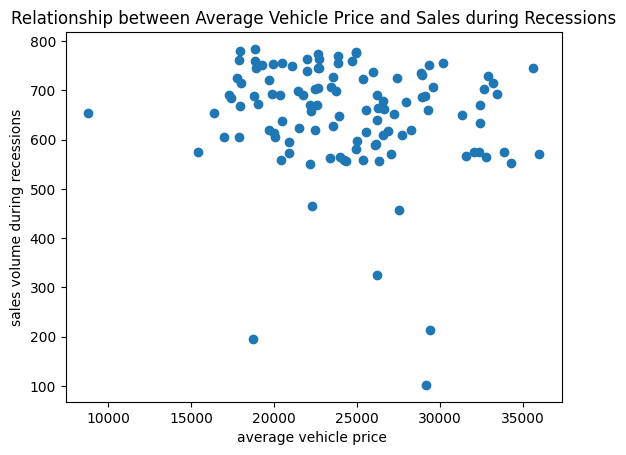

In [55]:
rec_data = df[df['Recession'] == 1]
plt.scatter(rec_data['Price'], rec_data['Automobile_Sales'])
    
plt.xlabel('average vehicle price ')
plt.ylabel('sales volume during recessions')
plt.title('Relationship between Average Vehicle Price and Sales during Recessions')
plt.show()

There is not much relation!

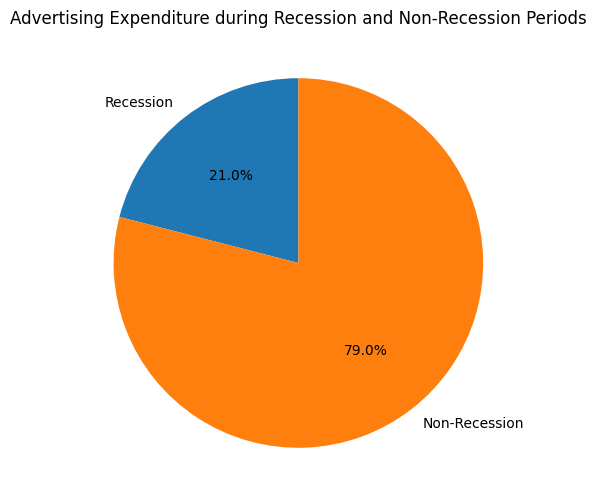

In [57]:
Rdata = df[df['Recession'] == 1]
NRdata = df[df['Recession'] == 0]
RAtotal = Rdata['Advertising_Expenditure'].sum()
NRAtotal = NRdata['Advertising_Expenditure'].sum()
plt.figure(figsize=(8, 6))
labels = ['Recession', 'Non-Recession']
sizes = [RAtotal, NRAtotal]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Advertising Expenditure during Recession and Non-Recession Periods')
plt.show()

It seems XYZAutomotives has been spending much more on the advertisements during non-recession periods as compared to during recession times.

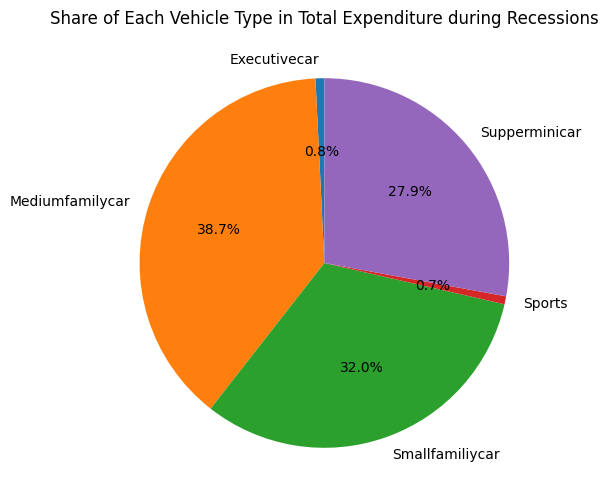

In [58]:
Rdata = df[df['Recession'] == 1]
VTexpenditure = Rdata.groupby('Vehicle_Type')['Automobile_Sales'].sum()
plt.figure(figsize=(6,6))
labels = VTexpenditure.index
sizes = VTexpenditure.values
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Share of Each Vehicle Type in Total Expenditure during Recessions')
plt.show()

During recession the advertisements were mostly focued on low price range vehicle.

C:\Users\Acer\AppData\Local\Temp\ipykernel_68544\2598729071.py:2: UserWarning: 
The markers list has fewer values (1) than needed (5) and will cycle, which may produce an uninterpretable plot.
  sbn.lineplot(data=df_rec, x='unemployment_rate', y='Automobile_Sales',hue='Vehicle_Type', style='Vehicle_Type', markers='o', err_style=None)


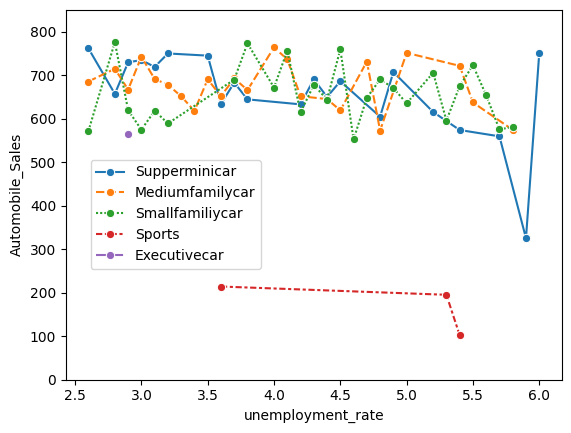

In [62]:
df_rec = df[df['Recession']==1]
sbn.lineplot(data=df_rec, x='unemployment_rate', y='Automobile_Sales',hue='Vehicle_Type', style='Vehicle_Type', markers='o', err_style=None)
plt.ylim(0,850)
plt.legend(loc=(0.05,.3))

All three categories—Supperminicar, Mediumfamilycar, and Smallfamilycar—show highly volatile sales, with no clear relationship to the unemployment rate. The most significant event is the Supperminicar's sudden sales collapse when the unemployment rate hits its peak, suggesting its sales are vulnerable to extremely high unemployment.

# 2nd assignment


In [1]:

import dash
from dash import dcc
from dash import html
from dash.dependencies import Input, Output
import pandas as pd
import plotly.graph_objs as go
import plotly.express as px

In [6]:
# Load the data using pandas
data = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/historical_automobile_sales.csv')

# --- Improvement for Month Sorting ---
# Convert 'Month' to an ordered categorical type to ensure correct plotting order
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
data['Month'] = pd.Categorical(data['Month'], categories=month_order, ordered=True)
# -------------------------------------

# Initialize the Dash app
app = dash.Dash(__name__)

# Set the title of the dashboard
app.title = "Automobile Statistics Dashboard"

#---------------------------------------------------------------------------------
# Create the dropdown menu options
dropdown_options = [
    {'label': 'Yearly Statistics', 'value': 'Yearly Statistics'},
    {'label': 'Recession Period Statistics', 'value': 'Recession Period Statistics'}
]
# List of years 
year_list = [i for i in range(1980, 2024, 1)]
#---------------------------------------------------------------------------------------
# Create the layout of the app
app.layout = html.Div([
    #TASK 2.1 Add title to the dashboard
    html.H1("Automobile Sales Statistics Dashboard", 
            style={'textAlign': 'center', 'color': '#503D36', 'fontSize': 24}), #Include style for title
    #TASK 2.2: Add two dropdown menus
    html.Div([
        html.Label("Select Statistics:"),
        dcc.Dropdown(
            id='dropdown-statistics',
            options=dropdown_options,
            value='Yearly Statistics',
            placeholder='Select a report type'
        )
    ]),
    html.Div(dcc.Dropdown(
            id='select-year',
            options=[{'label': i, 'value': i} for i in year_list],
            value=1980,
            placeholder='Select a year'
        )),
    html.Div([#TASK 2.3: Add a division for output display
    html.Div(id='output-container', className='chart-grid', style={'padding': '20px'}),])
])
#TASK 2.4: Creating Callbacks
# Define the callback function to update the input container based on the selected statistics
@app.callback(
    Output(component_id='select-year', component_property='disabled'),
    Input(component_id='dropdown-statistics',component_property='value'))

def update_input_container(selected_statistics):
    if selected_statistics == 'Yearly Statistics': 
        return False
    else: 
        return True

#Callback for plotting
# Define the callback function to update the input container based on the selected statistics
@app.callback(
    Output(component_id='output-container', component_property='children'),
    [Input(component_id='dropdown-statistics', component_property='value'), 
     Input(component_id='select-year', component_property='value')])


def update_output_container(selected_statistics, input_year):
    if selected_statistics == 'Recession Period Statistics':
        # Filter the data for recession periods
        recession_data = data[data['Recession'] == 1]
        
#TASK 2.5: Create and display graphs for Recession Report Statistics

#Plot 1 Automobile sales fluctuate over Recession Period (year wise)
        # use groupby to create relevant data for plotting
        yearly_rec=recession_data.groupby('Year')['Automobile_Sales'].mean().reset_index()
        R_chart1 = dcc.Graph(
            figure=px.line(yearly_rec, 
                x='Year',
                y='Automobile_Sales',
                title="Average Automobile Sales fluctuation over Recession Period"))

#Plot 2 Calculate the average number of vehicles sold by vehicle type       
        
        # use groupby to create relevant data for plotting
        #Hint:Use Vehicle_Type and Automobile_Sales columns
        average_sales = recession_data.groupby('Vehicle_Type')['Automobile_Sales'].mean().reset_index()
        R_chart2 = dcc.Graph(
            figure=px.bar(average_sales,
                x='Vehicle_Type',
                y='Automobile_Sales',
                title="Average Vehicles Sold by Vehicle Type during Recession"))
        
# Plot 3 Pie chart for total expenditure share by vehicle type during recessions
        # grouping data for plotting
        # Hint:Use Vehicle_Type and Advertising_Expenditure columns
        exp_rec= recession_data.groupby('Vehicle_Type')['Advertising_Expenditure'].sum().reset_index()
        R_chart3 = dcc.Graph(
            figure=px.pie(exp_rec,
                values='Advertising_Expenditure',
                names='Vehicle_Type',
                title="Total Advertising Expenditure Share by Vehicle Type during Recessions"
            )
        )

# Plot 4 bar chart for the effect of unemployment rate on vehicle type and sales
        #grouping data for plotting
        # Hint:Use unemployment_rate,Vehicle_Type and Automobile_Sales columns
        unemp_data = recession_data.groupby(['unemployment_rate', 'Vehicle_Type'])['Automobile_Sales'].mean().reset_index()
        R_chart4 = dcc.Graph(figure=px.bar(unemp_data,
            x='unemployment_rate',
            y='Automobile_Sales',
            color='Vehicle_Type',
            labels={'unemployment_rate': 'Unemployment Rate', 'Automobile_Sales': 'Average Automobile Sales'},
            title='Effect of Unemployment Rate on Vehicle Type and Sales'))


        return [
            html.Div(className='chart-item', children=[html.Div(children=R_chart1),html.Div(children=R_chart2)],style={'display': 'flex'}),
            html.Div(className='chart-item', children=[html.Div(children=R_chart3), html.Div(children=R_chart4)],style={'display': 'flex'})
            ]

# TASK 2.6: Create and display graphs for Yearly Report Statistics
 # Yearly Statistic Report Plots
    # Check for Yearly Statistics.                                   
    elif (input_year and selected_statistics == 'Yearly Statistics') :
        yearly_data = data[data['Year'] == input_year]
                                
#plot 1 Yearly Automobile sales using line chart for the whole period.
        # grouping data for plotting.
        # Hint:Use the columns Year and Automobile_Sales.
        yas= data.groupby('Year')['Automobile_Sales'].mean().reset_index()
        Y_chart1 = dcc.Graph(figure=px.line(yas, x='Year', y='Automobile_Sales', title='Average Automobile Sales over the Years'))
            
# Plot 2 Total Monthly Automobile sales using line chart.
        # grouping data for plotting.
        # Hint:Use the columns Month and Automobile_Sales.
        # We use the full 'data' here, not 'yearly_data', as per the graph's purpose
        mas=data.groupby('Month')['Automobile_Sales'].sum().reset_index()
        Y_chart2 = dcc.Graph(figure=px.line(mas,
                x='Month',
                y='Automobile_Sales',
                title='Total Monthly Automobile Sales'))

  # Plot bar chart for average number of vehicles sold during the given year
        # grouping data for plotting.
        # Hint:Use the columns Year and Automobile_Sales
        avr_vdata=yearly_data.groupby('Vehicle_Type')['Automobile_Sales'].mean().reset_index()
        Y_chart3 = dcc.Graph(figure=px.bar(avr_vdata, x='Vehicle_Type', y='Automobile_Sales',title='Average Vehicles Sold by Vehicle Type in the year {}'.format(input_year)))

    # Total Advertisement Expenditure for each vehicle using pie chart
        # grouping data for plotting.
        # Hint:Use the columns Vehicle_Type and Advertising_Expenditure
        exp_data=yearly_data.groupby('Vehicle_Type')['Advertising_Expenditure'].sum().reset_index()
        Y_chart4 = dcc.Graph(figure=px.pie(exp_data, values='Advertising_Expenditure', names='Vehicle_Type', title='Total Advertising Expenditure Share by Vehicle Type in the year {}'.format(input_year)))

#TASK 2.6: Returning the graphs for displaying Yearly data
        return [
                html.Div(className='chart-item', children=[html.Div(children=Y_chart1),html.Div(children=Y_chart2)],style={'display':'flex'}),
                html.Div(className='chart-item', children=[html.Div(children=Y_chart3), html.Div(children=Y_chart4)],style={'display': 'flex'})
                ]
    
    else:
        return None

# Run the Dash app
if __name__ == '__main__':
    app.run(debug=True)



C:\Users\Acer\AppData\Local\Temp\ipykernel_74200\1280688194.py:141: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

C:\Users\Acer\AppData\Local\Temp\ipykernel_74200\1280688194.py:141: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

C:\Users\Acer\AppData\Local\Temp\ipykernel_74200\1280688194.py:141: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

C:\Users\Acer\AppData\Local\Temp\ipykernel_74200\1280688194.py:141: FutureWarning: